# Analyzing metric on State of the Art Models

In this experiment, we evaluated the performance of leading large language models, specifically ChatGPT and Claude, in comparison to Gemma. Both ChatGPT and Claude are general-purpose conversational models with extensive capabilities, which generally enhances their performance in zero-shot generation tasks. In contrast, Gemma may be tailored or designed for specific applications, potentially limiting its effectiveness in this context. The results indicate that Claude achieved the highest score of 54.3%, with ChatGPT following closely with a score of 50.3%. In comparison, Gemma's performance was notably lower, with a score of 27.1%.

#### Imports

In [1]:
import sys
import pandas as pd
sys.path.append("..")
import seaborn as sns
import nltk
from thefuzz import fuzz
import matplotlib.pyplot as plt

from humor.bipartite_metric import bipartite_metric

In [2]:
ground_truth = pd.read_csv('/home/ada/humor/data/stand_up_dataset/standup_data.csv')
gemma = pd.read_csv('/home/ada/humor/data/stand_up_dataset/gemma_answers.csv')
chatgpt = pd.read_csv("/home/ada/humor/data/stand_up_dataset/Chat_GPT_results - Sheet1.csv")
claude = pd.read_csv("/home/ada/humor/data/stand_up_dataset/Claude_results - Sheet1.csv")
gemma_llm = gemma.loc[gemma["comedian"].isin(["John_Mulaney", "Jimmy_Yang", "Russell_Peters", "Ali_Wong", "Hasan_Minhaj", "Chelsea_Peretti", "Trevor_Noah_2", "Joe_List", "Anthony_Jeselnik", "Sam_Morril_2"])]
llm_gt = ground_truth.loc[ground_truth["comedian"].isin(["John_Mulaney", "Jimmy_Yang", "Russell_Peters", "Ali_Wong", "Hasan_Minhaj", "Chelsea_Peretti", "Trevor_Noah_2", "Joe_List", "Anthony_Jeselnik", "Sam_Morril_2"])]

Experiment

In [3]:
gemma_llm_metric = bipartite_metric(gemma_llm, llm_gt)
print("Gemma: ", gemma_llm_metric.select_dtypes(include='number').mean())

chatgpt_metric = bipartite_metric(chatgpt, llm_gt)
print("ChatGPT:", chatgpt_metric.select_dtypes(include='number').mean())

claude_metric = bipartite_metric(claude, llm_gt)
print("Claude:", claude_metric.select_dtypes(include='number').mean())

Gemma:  score    27.079583
dtype: float64
ChatGPT: score    50.261667
dtype: float64
Claude: score    54.257619
dtype: float64


<Figure size 500x500 with 0 Axes>

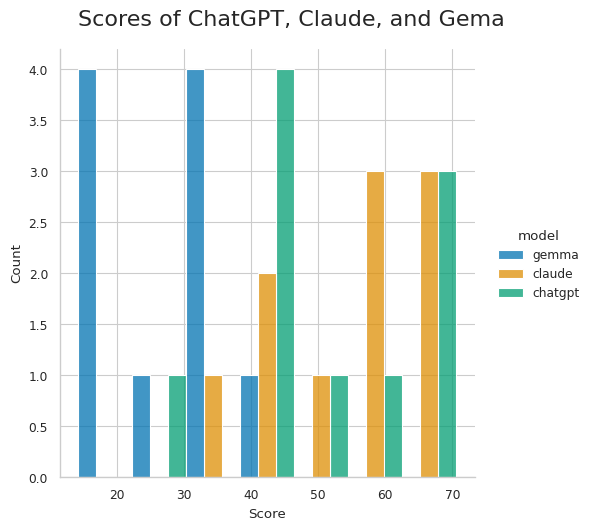

In [4]:
gemma = gemma_llm_metric.assign(model = "gemma")
claude = claude_metric.assign(model="claude") 
chatgpt = chatgpt_metric.assign(model="chatgpt")
df = pd.concat([gemma, claude, chatgpt]).reset_index(drop=True)

sns.set_style("whitegrid")
sns.set_context("paper")
plt.figure(figsize=(5, 5))  
sns.set_palette("colorblind")

plot = sns.displot(df, x="score", hue="model", kind="hist", shrink=1, multiple="dodge", bins=7)

plot.fig.suptitle("Scores of ChatGPT, Claude, and Gema", fontsize=16, y=1.05)  
plot.set_axis_labels("Score", "Count")  
plot.savefig("experiment_03.png", dpi=300)
plt.show()